### Final Project: Analysis Plan
#### McKenna Gammon

#### Data:
I'm still utilizing the original data set that I intended on using. However, I researched some further information. Since my dataset does have the attribute 'Actors', I think that utilizing another data set of some quantifiable information for U.S. actors will be extremely helpful in my project. I found a data set of 2021's most popular actors/actresses that are resembled by a calculated score (the calculation uses Fame and Popularity percentages). 
I want to use that (actor popularity) score in comparison to the 'Hidden Gem Score' attribute that is a column from my original data set. I want to test if the actor(s) or actress(es) in a movie with a high 'Hidden Gem Score', have a high ranking/calculation score. So, do movies with high 'Hidden Gem Scores' have "popular" actor(s) or actress(es) casted in them? The link to the popularity scores for actors and actresses is below:
https://today.yougov.com/ratings/entertainment/fame/all-time-actors-actresses/all
I will most likely need to manually transfer over these data points to a table so it can be imported into the notebook correctly for proper analysis and visualizations. I can then add/join this attribute to the already existing dataset.

I want to focus on movies that have the 'Country Availability' attribute of 'United States' due to the focus of movies in the U.S. So, I will need to figure out how to select only the entities that match 'United States' before  add in the actor/actress popularity score data. For further analysis, I could also compare the new data (actress/actor popularity scores) with other scored columns containing value entities such as 'Rotton Tomatoes Score', or 'IMDb Votes', or 'Metacritic Score'.

In [33]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
ls

Aug31_inclass_practice.ipynb
Equal_Audio_Features.csv
Equal_Track_Data.csv
Final Project - Data in Hand.ipynb
Final Project Analysis Plan - McKenna Gammon.ipynb
Likes Report.ipynb
Montero
Montero_Audio_Features.csv
Montero_Track_Data.csv
Nov-2-in-class-(statistical tests).ipynb
Nov-4-in-class-bivariate.ipynb
Oct-19-In-Class.ipynb
Oct-26-in-class.ipynb
October 5 - Twitter API.ipynb
October-21-in-class (Indeed).ipynb
October-7-in-class.ipynb
Sept 7 - In-Class 2.ipynb
Sept. 7 - In-Class.ipynb
Sept.30_in_class.ipynb
Spotify_API_Knight.ipynb
Twitter Text Report.ipynb
Twitter-keys.txt
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
Untitled4.ipynb
bls_data.csv
chinook.db
netflix-rotten-tomatoes-metacritic-imdb.csv
sept-28.ipynb


In [8]:
netflix_data = pd.read_csv('netflix-rotten-tomatoes-metacritic-imdb.csv', encoding = 'utf-8')

In [9]:
netflix_data

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,K-POP Extreme Survival,NaN,"TV Dramas,TV Programmes,TV Comedies,Romantic T...",NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,NaN,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/80031595,NaN,Seung Yeon decides to chase her dream of becom...,NaN,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,NaN,NaN,NaN
15476,DreamWorks Shreks Swamp Stories,NaN,"Animal Tales,Family Comedies,Family Adventures...",NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",< 30 minutes,NaN,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/70242630,NaN,"Shrek celebrates Halloween, Puss in Boots is c...",NaN,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,NaN,NaN,NaN
15477,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/70259784,NaN,Madagascar goes wild with holiday spirit in th...,71.0,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...,NaN,NaN,NaN
15478,DreamWorks Holiday Classics,"Animation, Comedy, Family","TV Comedies,Kids TV,TV Cartoons,TV Programmes,...",English,Series,8.2,"Belgium,Switzerland,Germany,Argentina,United K...",< 30 minutes,NaN,NaN,...,2015-04-14,Fox,https://www.netflix.com/watch/70221348,NaN,Join your DreamWorks friends for these four ho...,82.0,https://occ-0-2851-38.1.nflxso

In [10]:
netflix_data.keys()

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

In [59]:
netflix_data['Languages'].astype('category')

0        Swedish, Spanish
1                 English
2                 English
3                 Turkish
4                 English
               ...       
15475                 NaN
15476                 NaN
15477             English
15478             English
15479             English
Name: Languages, Length: 15480, dtype: category
Categories (1438, object): ['Afrikaans', 'Afrikaans, English', 'Afrikaans, German, Swiss German', 'Akan', ..., 'Zulu', 'Zulu, Afrikaans, Xhosa, English', 'Zulu, English, Southern Sotho, Tswana', 'Zulu, Xhosa, Afrikaans, English']

In [62]:
netflix_data['Hidden Gem Score'].astype('category')

0        4.3
1        7.0
2        6.4
3        7.7
4        8.1
        ... 
15475    NaN
15476    NaN
15477    8.4
15478    8.2
15479    8.1
Name: Hidden Gem Score, Length: 15480, dtype: category
Categories (93, float64): [0.6, 0.7, 0.8, 0.9, ..., 9.5, 9.6, 9.7, 9.8]

In [65]:
netflix_data['Metacritic Score'].astype('category')

0        82.0
1        69.0
2        46.0
3         NaN
4         NaN
         ... 
15475     NaN
15476     NaN
15477     NaN
15478     NaN
15479     NaN
Name: Metacritic Score, Length: 15480, dtype: category
Categories (95, float64): [5.0, 6.0, 8.0, 9.0, ..., 97.0, 98.0, 99.0, 100.0]

#### * Will need to clean data further to only select/show movies (in analysis, results, and visualizations) that have a Hidden Gem Score, Metacritic Score, Rotten Tomatoes Score, etc. for more accurate comparison of the movie data entries.

In [66]:
netflix_data['Actors'].iloc[15130]

'Will Shadley, Amber Valletta, Madeline Carroll, Jackie Chan'

In [32]:
netflix_data['Actors'].iloc[13536]

'Thomas Haden Church, Tobey Maguire, Kirsten Dunst, James Franco'

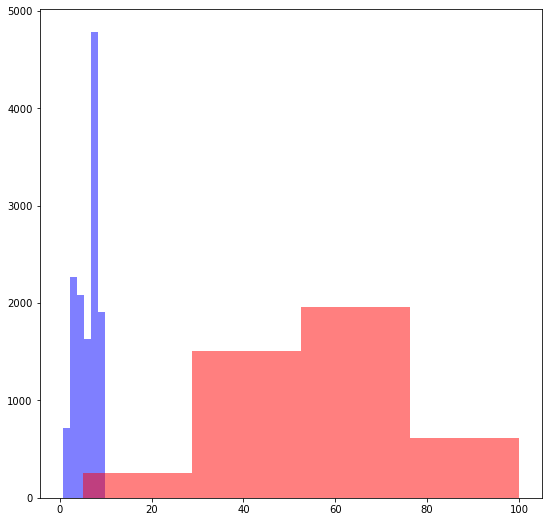

In [48]:
fig1, ax1 = plt.subplots(1, 1, figsize = (9, 9))
ax1.hist(netflix_data['Hidden Gem Score'], bins = 6, color = 'blue', alpha = .5)
ax1.hist(netflix_data['Metacritic Score'], bins = 4, color = 'red', alpha = .5)
plt.show()

In [45]:
stats.describe(netflix_data['Metacritic Score'])

DescribeResult(nobs=15480, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)

In [46]:
stats.describe(netflix_data['Hidden Gem Score'])

DescribeResult(nobs=15480, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)

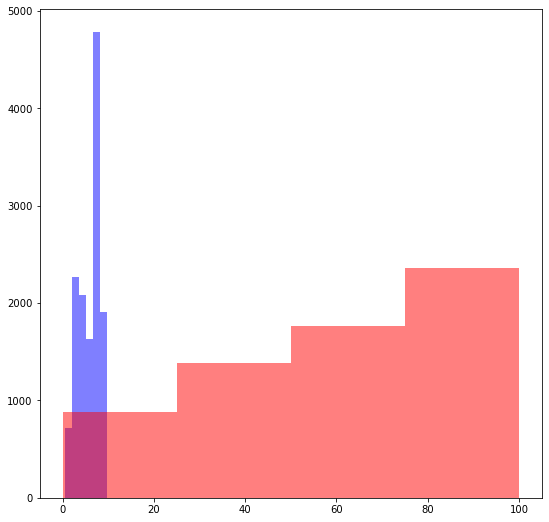

In [50]:
fig1, ax1 = plt.subplots(1, 1, figsize = (9, 9))
ax1.hist(netflix_data['Hidden Gem Score'], bins = 6, color = 'blue', alpha = .5)
ax1.hist(netflix_data['Rotten Tomatoes Score'], bins = 4, color = 'red', alpha = .5)
plt.show()

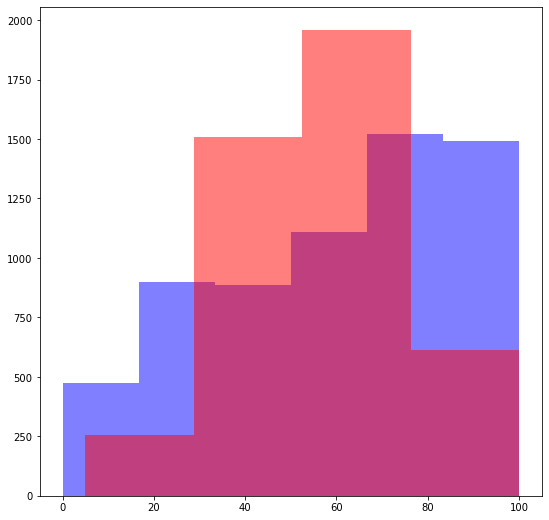

In [51]:
fig1, ax1 = plt.subplots(1, 1, figsize = (9, 9))
ax1.hist(netflix_data['Rotten Tomatoes Score'], bins = 6, color = 'blue', alpha = .5)
ax1.hist(netflix_data['Metacritic Score'], bins = 4, color = 'red', alpha = .5)
plt.show()